MAE: 4.626577576510433
R² Score: 0.747089388448398


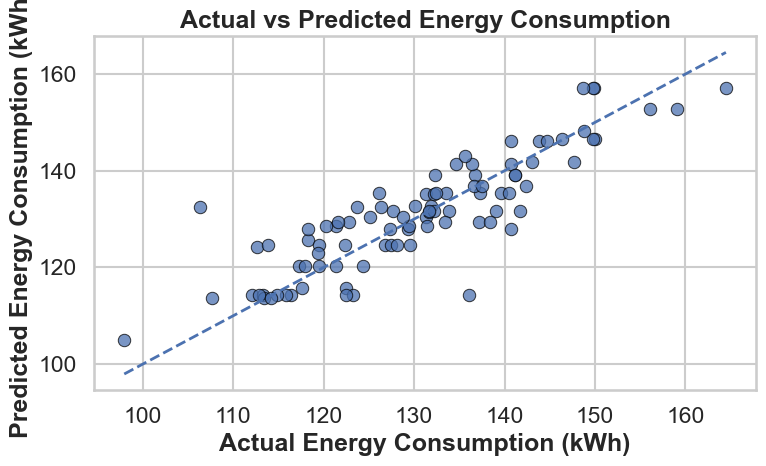

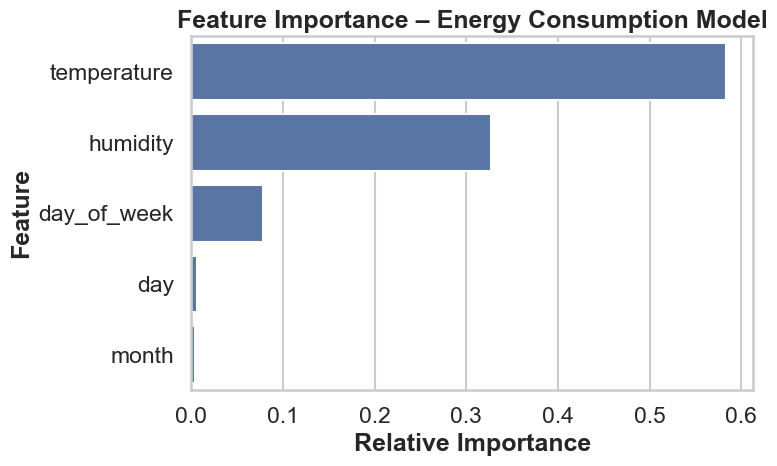

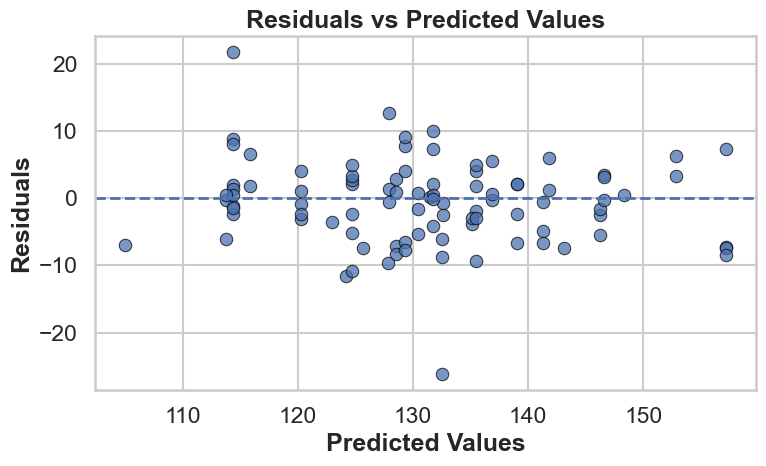

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

sns.set_theme(
    style="whitegrid",
    context="talk",
    palette="deep"
)

plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

np.random.seed(42)

dates = pd.date_range(start="2023-01-01", periods=365, freq="D")

temperature = np.random.normal(25, 5, size=len(dates))
humidity = np.random.normal(60, 10, size=len(dates))
day_of_week = dates.dayofweek

energy_consumption = (
    50
    + (temperature * 1.8)
    + (humidity * 0.5)
    + (day_of_week * 2)
    + np.random.normal(0, 5, size=len(dates))
)

df = pd.DataFrame({
    "date": dates,
    "temperature": temperature,
    "humidity": humidity,
    "day_of_week": day_of_week,
    "energy_consumption": energy_consumption
})

df.head()


df["month"]=df["date"].dt.month
df["day"]=df["date"].dt.day

x = df.drop(columns=["date", "energy_consumption"])
y= df["energy_consumption"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42
)
model=DecisionTreeRegressor(
    max_depth=6,
    min_samples_split=10,
    random_state=42
)
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

plt.figure()
sns.scatterplot(
    x=y_test,
    y=y_pred,
    alpha=0.75,
    s=80,
    edgecolor="black"
)

plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--",
    linewidth=2
)

plt.xlabel("Actual Energy Consumption (kWh)")
plt.ylabel("Predicted Energy Consumption (kWh)")
plt.title("Actual vs Predicted Energy Consumption")
plt.tight_layout()
plt.show()

feature_importance = pd.Series(
    model.feature_importances_,
    index=x.columns
).sort_values(ascending=False)

plt.figure()
sns.barplot(
    x=feature_importance.values,
    y=feature_importance.index,
    orient="h"
)

plt.xlabel("Relative Importance")
plt.ylabel("Feature")
plt.title("Feature Importance – Energy Consumption Model")
plt.tight_layout()
plt.show()

residuals = y_test - y_pred

plt.figure()
sns.scatterplot(
    x=y_pred,
    y=residuals,
    alpha=0.75,
    edgecolor="black"
)

plt.axhline(0, linestyle="--", linewidth=2)

plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.tight_layout()
plt.show()
